In [1]:
# Importar Keras, TensorFlow y otras librerías útiles

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# Importar el dataset

mnist = keras.datasets.mnist

# Al cargar el dataset se obtienen 4 arreglos NumPy

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Como cada imagen del dataset no tiene nombre, los indicamos en un array 
# para ser usados posteriormente al graficar

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
# Preprocesamiento de la data para que cumpla con el formato requerido antes de entrenar al modelo.

train_images = train_images / 255.0

test_images = test_images / 255.0

In [4]:
### Construir el modelo ###


# Setear las capas
# Desnse significa que va a ser una red altamente conexa, donde el output de todas las neuronas de una capa
#son los inputs de las neuronas de la capa siguiente.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilar el modelo

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
### Entrenar el modelo ###

# Alimentar el modelo usando los arrays obtenidos al cargar el dataset

model.fit(train_images, train_labels, epochs=10)

# Hacer chequeos para evaluar exactitud, y si no es la correcta, usar estrategias para prevenirlo


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2628 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1172 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0810 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [8]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [18]:
### Ejemplo 1 de predicción con modelo entrenado ###


probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Obtener array de 10 números que representan la posibilidad de matcheo para cada caracter.

predictions[0]

# Obtener el caracter con mayores posibilidades de matchear

np.argmax(predictions[0])

# Examinar el valor asociado a caracter

test_labels[0]

7

(28, 28)
(1, 28, 28)
[[1.7429196e-10 9.9901056e-01 3.1811871e-09 1.0957525e-09 3.0765128e-07
  1.1893673e-12 9.2526931e-11 9.8881114e-04 2.4068024e-07 1.2838694e-10]]


1

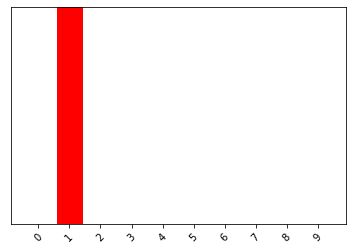

In [19]:
### Ejemplo 2 de predicción con modelo entrenado ###


# Tomar una imagen del dataset

img = test_images[5]
print(img.shape)

# Añadir la imagen a un conjunto en el que es el único elemento

img = (np.expand_dims(img,0))
print(img.shape)

# Predecir la label correcta para la imagen

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


# Recolectar predicciones para la única imagen en el conjunto

np.argmax(predictions_single[0])